<h1><p style="text-align: center;"><strong>Studying the Boston housing Dataset</strong></h1>

<div style="border-top: 2px;border-bottom: 2px;border-style: solid;border-color: #003366;padding: 20px;">
<h3><p style="text-align: center;"><strong>Table of Contents</strong></h3>
<ol>
<li><a href="#intro"> Introduction </a></li> 
<li><a href="#Exploratory analysis of the dataset"> Exploratory analysis of the dataset </a></li> 
<li><a href="#Variable transformation"> Variable transformation</a></li>    
<li><a href="#Train/test datasets"> Train/test datasets</a></li> 
<li><a href="#Conclusions"> Conclusions </a></li> 
</ol>
</div>

<div class="alert alert-success h1" role="alert">
    <b>Introduction</b>
<a class="anchor" id="intro"></a> </div>


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000usd
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

#Machine learning
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
#Warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

C:\Users\josep\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<div class="alert alert-success h1" role="alert">
    <b>Exploratory analysis of the dataset</b>
<a class="anchor" id="Exploratory analysis of the dataset"></a> </div>


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data=pd.read_csv('housing data.csv', header=None, delimiter=",", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df=data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.select_dtypes(include=['float64', 'int']).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


We observe that the mean value, 225300$\$$ as well as the $Q_3$, 250000$\$$ are much lower than the maximum value, 500000$\$$. Hence, we may expect outliers in the MEDV distribution values.

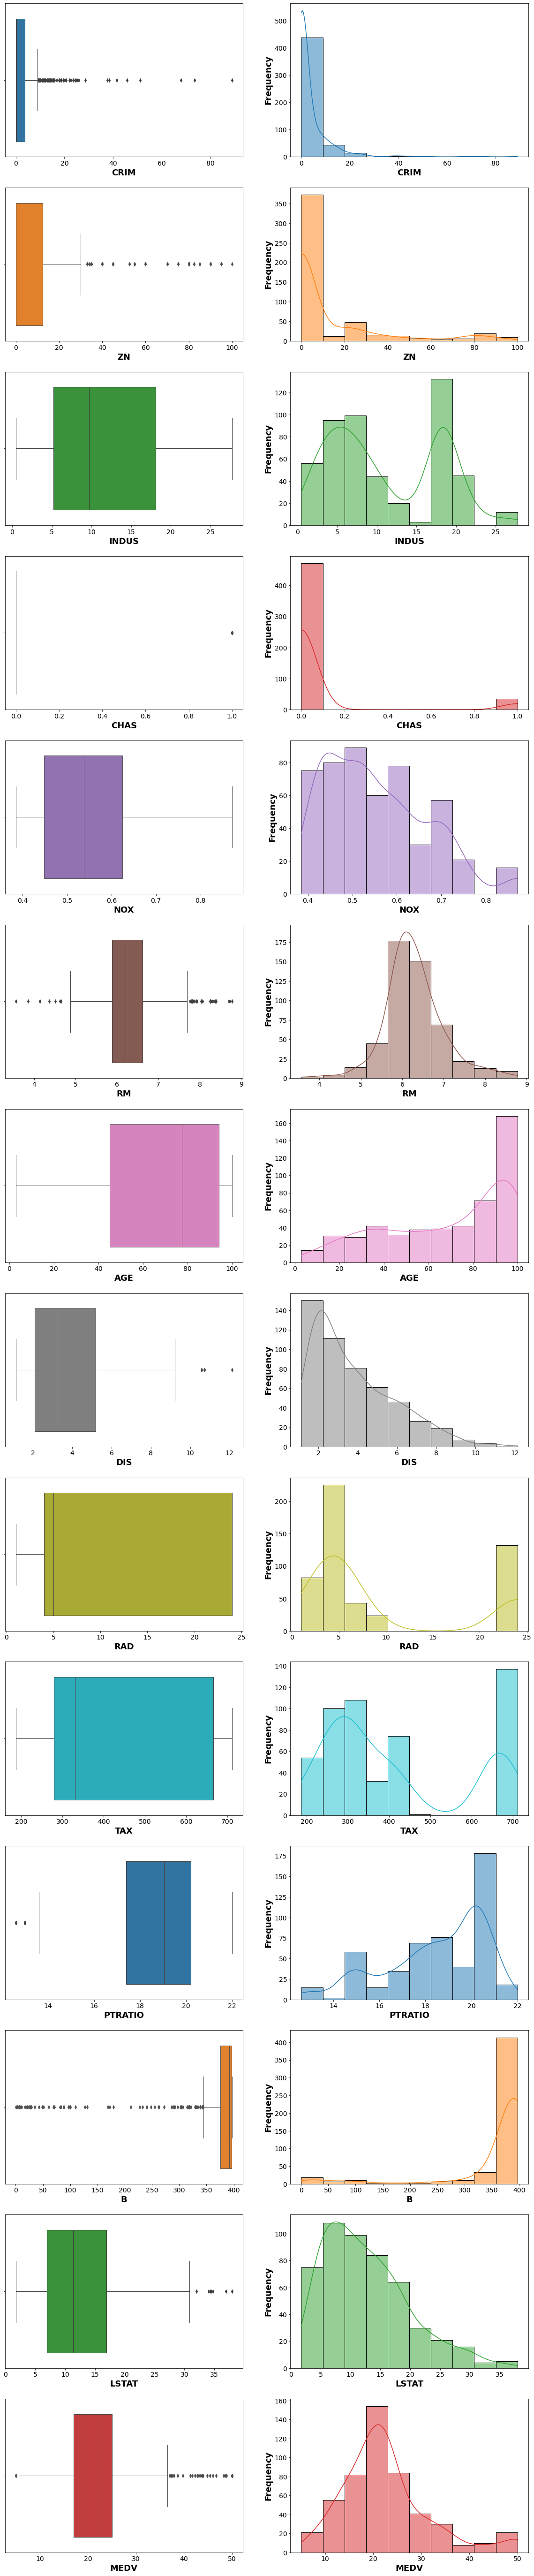

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=len(df.columns), figsize=(20, 100))
row=0
for i in df.columns:
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=df[i],  ax=axs[row][0] , linewidth= 1.0, color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
    axs[row][0].set_xlabel(str(i), fontsize = 18, fontweight = "bold")
    axs[row][0].tick_params(labelsize = 14)
    sns.histplot(df[i], ax=axs[row][1], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
    axs[row][1].set_xlabel(str(i),fontsize = 18, fontweight = "bold")
    axs[row][1].set_ylabel('Frequency', fontsize = 18, fontweight = "bold")
    axs[row][1].tick_params(labelsize = 14)
    row+=1

Columns like CRIM, ZN, RM, B seems to have outliers. On the other hand, the MEDV distribution  shows 'peakedness', positive skewness. A simple data transformation can solve the problem. Prior to this,  let's see the outliers percentage in every column.

In [8]:
#Calculate percentage of outliers
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


We observe that the MEDV column has 7.91% of outliers. Note that the CHAS column has 100\% of outliers due to the fact that it is a dummie variable. Let's look now to the correlation between the MEDV column and the other variables:

In [9]:
df.groupby('CHAS').agg({'CRIM' : 'mean', 'ZN' : 'mean', 'INDUS' : 'mean', 'NOX' : 'mean', 'RM' : 'mean',
                              'AGE' : 'mean', 'DIS' : 'mean', 'TAX' : 'mean',
       'PTRATIO' : 'mean', 'B' : 'mean', 'LSTAT' : 'mean', 'MEDV' : 'mean'})

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,409.870488,18.527176,355.461040,12.757941,22.093843
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,386.257143,17.491429,372.997429,11.241714,28.440000


We can conclude that the percentage of per capita crime rate by town, the proportion of residential land zoned, the weighted distances to five Boston employment centres, the full-value property-tax rate per $10,000, are higher if the house is far from the river. On the other hand, if the house is close to the river, the houses are older, the proportion of blacks is higher, and the housing prices increases. 

<AxesSubplot:>

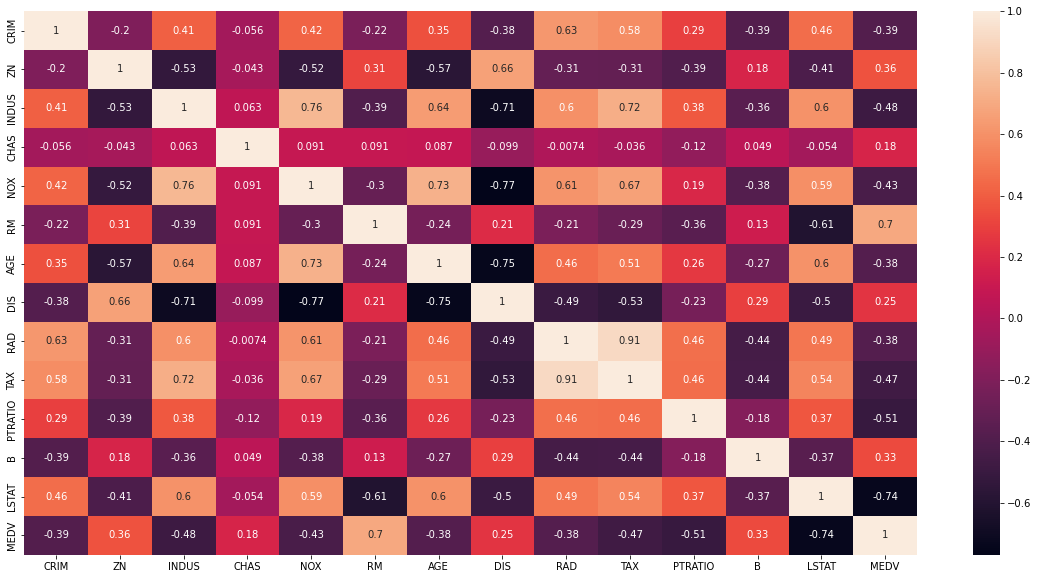

In [10]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix,  annot=True)

In [11]:
# Correlation between numerical columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Function to convert a correlation matrix into a tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
matrix=tidy_corr_matrix(corr_matrix)
matrix[matrix.variable_2=='MEDV'].sort_values(by='abs_r', ascending=False)

,variable_1,variable_2,r,abs_r
181,LSTAT,MEDV,-0.737663,0.737663
83,RM,MEDV,0.695360,0.695360
153,PTRATIO,MEDV,-0.507787,0.507787
41,INDUS,MEDV,-0.483725,0.483725
139,TAX,MEDV,-0.468536,0.468536
69,NOX,MEDV,-0.427321,0.427321
13,CRIM,MEDV,-0.388305,0.388305
125,RAD,MEDV,-0.381626,0.381626
97,AGE,MEDV,-0.376955,0.376955
27,ZN,MEDV,0.360445,0.360445


We select the columns that they are not strongly correlated, i.e., $|r|<0.5$:

In [12]:
# Train-test division of dataset
# ==============================================================================
col_selected=matrix[(matrix.variable_2=='MEDV')&(matrix.abs_r<=0.5)].variable_1
X=df[col_selected]
X = X.drop(['CHAS'], axis=1)
X

,INDUS,TAX,NOX,CRIM,RAD,AGE,ZN,B,DIS
0,2.31,296.0,0.538,0.00632,1,65.2,18.0,396.90,4.0900
1,7.07,242.0,0.469,0.02731,2,78.9,0.0,396.90,4.9671
2,7.07,242.0,0.469,0.02729,2,61.1,0.0,392.83,4.9671
3,2.18,222.0,0.458,0.03237,3,45.8,0.0,394.63,6.0622
4,2.18,222.0,0.458,0.06905,3,54.2,0.0,396.90,6.0622
...,...,...,...,...,...,...,...,...,...
501,11.93,273.0,0.573,0.06263,1,69.1,0.0,391.99,2.4786
502,11.93,273.0,0.573,0.04527,1,76.7,0.0,396.90,2.2875
503,11.93,273.0,0.573,0.06076,1,91.0,0.0,396.90,2.1675
504,11.93,273.0,0.573,0.10959,1,89.3,0.0,393.45,2.3889


<div class="alert alert-success h1" role="alert">
    <b>Variable transformation</b>
<a class="anchor" id="Variable transformation"></a> </div>


### Transforming the y-variable
The response variable, MEDV show a large skewness, so we may try to apply a transformation to improve it. 

In [13]:
from scipy.stats import shapiro
from scipy.stats import skew
print(shapiro(df['MEDV']))
print(skew(df['MEDV']))

ShapiroResult(statistic=0.91717529296875, pvalue=4.940618243974614e-16)
1.104810822864635


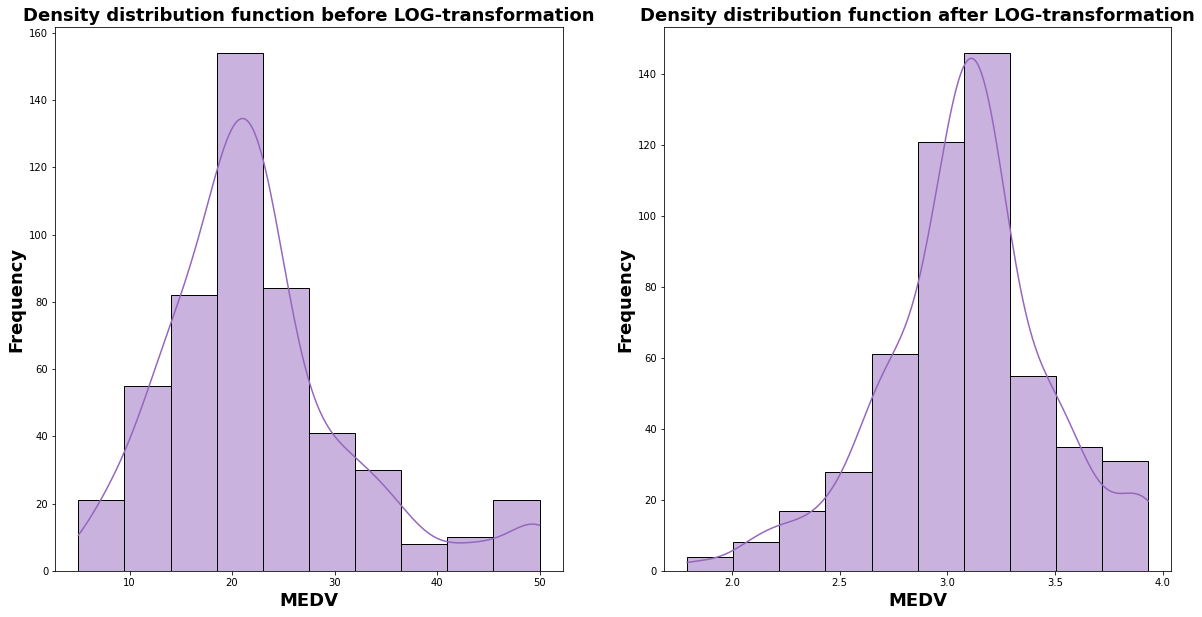

In [14]:
# Log transformation of response variable
# ==============================================================================
y = df['MEDV']
y =  np.log1p(y)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
sns.histplot(y, ax=axs[1], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
axs[0].set_title("Density distribution function before LOG-transformation", fontsize = 18, fontweight = "bold");
axs[0].set_xlabel("MEDV", fontsize = 18, fontweight = "bold");
axs[1].set_xlabel("MEDV", fontsize = 18, fontweight = "bold");
axs[0].set_ylabel("Frequency", fontsize = 18, fontweight = "bold");
axs[1].set_ylabel("Frequency", fontsize = 18, fontweight = "bold");
sns.histplot(df['MEDV'], ax=axs[0], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
axs[1].set_title("Density distribution function after LOG-transformation", fontsize = 18, fontweight = "bold");

In [15]:
print(shapiro(y))
print(skew(y))

ShapiroResult(statistic=0.9783119559288025, pvalue=7.71699149026972e-07)
-0.24052778511563522


The p-value is not surprisingly less than 0.05, so we can conclude that the variable is still skewed.

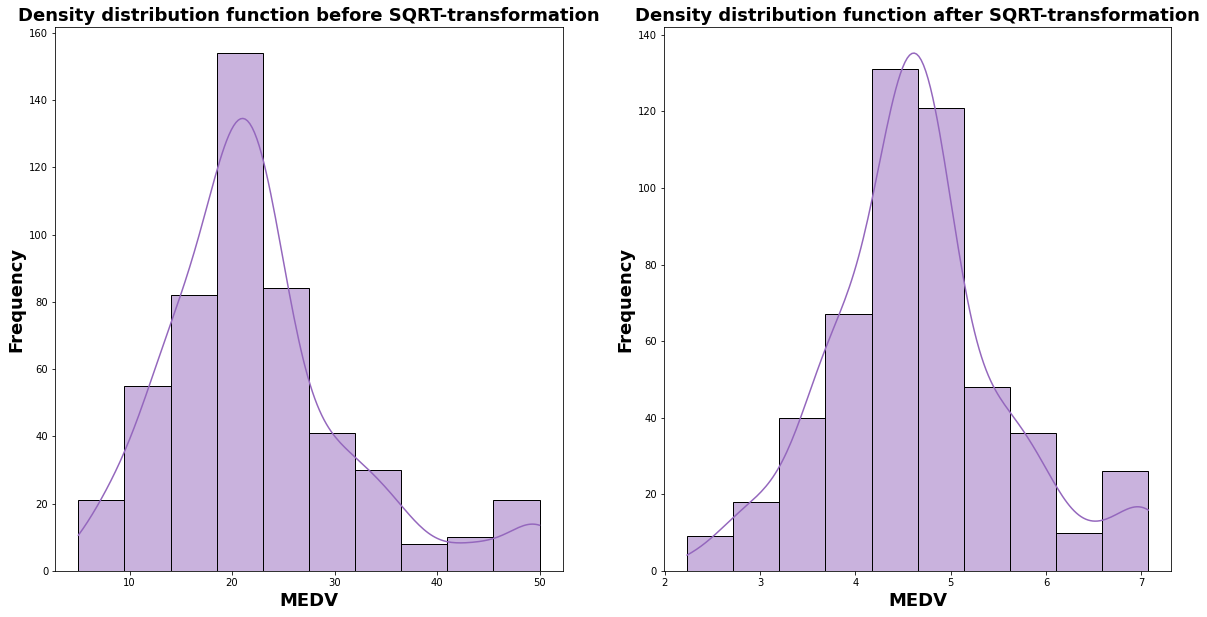

In [16]:
# Square Root transformation of response variable
# ==============================================================================
y = df['MEDV']
y =  np.sqrt(y)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
sns.histplot(y, ax=axs[1], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
axs[0].set_title("Density distribution function before SQRT-transformation", fontsize = 18, fontweight = "bold");
sns.histplot(df['MEDV'], ax=axs[0], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
axs[1].set_title("Density distribution function after SQRT-transformation", fontsize = 18, fontweight = "bold");
axs[0].set_xlabel("MEDV", fontsize = 18, fontweight = "bold");
axs[1].set_xlabel("MEDV", fontsize = 18, fontweight = "bold");
axs[0].set_ylabel("Frequency", fontsize = 18, fontweight = "bold");
axs[1].set_ylabel("Frequency", fontsize = 18, fontweight = "bold");

In [17]:
print(shapiro(y))
print(skew(y))

ShapiroResult(statistic=0.9698772430419922, pvalue=1.0988917331644643e-08)
0.43763305472800307


It seems that the best transformation is the log-transformation. 

In [18]:
y =  np.log1p(y)

### Transforming the X-variables

In [19]:
# Let's scale the columns before plotting them against MEDV
# ==============================================================================
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=X.columns)
X

,INDUS,TAX,NOX,CRIM,RAD,AGE,ZN,B,DIS
0,0.067815,0.208015,0.314815,0.000000,0.000000,0.641607,0.18,1.000000,0.269203
1,0.242302,0.104962,0.172840,0.000236,0.043478,0.782698,0.00,1.000000,0.348962
2,0.242302,0.104962,0.172840,0.000236,0.043478,0.599382,0.00,0.989737,0.348962
3,0.063050,0.066794,0.150206,0.000293,0.086957,0.441813,0.00,0.994276,0.448545
4,0.063050,0.066794,0.150206,0.000705,0.086957,0.528321,0.00,1.000000,0.448545
...,...,...,...,...,...,...,...,...,...
501,0.420455,0.164122,0.386831,0.000633,0.000000,0.681771,0.00,0.987619,0.122671
502,0.420455,0.164122,0.386831,0.000438,0.000000,0.760041,0.00,1.000000,0.105293
503,0.420455,0.164122,0.386831,0.000612,0.000000,0.907312,0.00,1.000000,0.094381
504,0.420455,0.164122,0.386831,0.001161,0.000000,0.889804,0.00,0.991301,0.114514


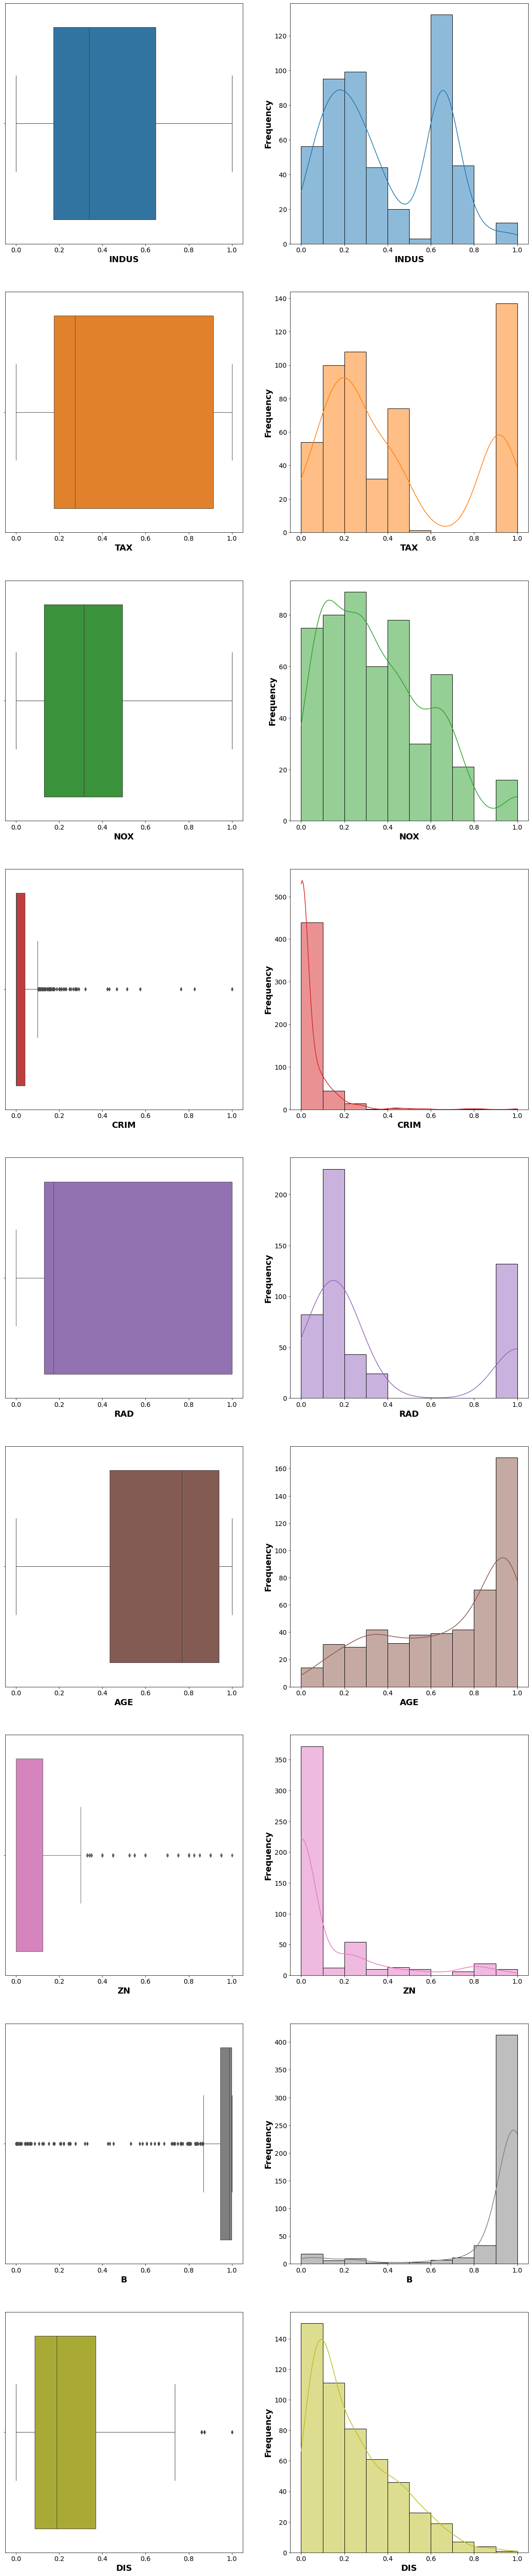

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=len(X.columns), figsize=(20, 100))
row=0
for i in X.columns:
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=X[i],  ax=axs[row][0] , linewidth= 1.0, color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
    axs[row][0].set_xlabel(str(i), fontsize = 18, fontweight = "bold")
    axs[row][0].tick_params(labelsize = 14)
    sns.histplot(X[i], ax=axs[row][1], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
    axs[row][1].set_xlabel(str(i),fontsize = 18, fontweight = "bold")
    axs[row][1].set_ylabel('Frequency', fontsize = 18, fontweight = "bold")
    axs[row][1].tick_params(labelsize = 14)
    row+=1

<div class="alert alert-success h1" role="alert">
    <b>Train/test datasets</b>
<a class="anchor" id="Train/test datasets"></a> </div>


### Splitting the data into train and test

In [21]:
# Splitting the data into train and test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Comparing y-test and y-train

In [22]:
pd.DataFrame([y_test,y_train], index=['Test','Train']).agg(['mean','std'], axis=1)

,mean,std
Test,1.720048,0.189983
Train,1.718317,0.159872


In [23]:
y_test.describe().T

count    102.000000
mean       1.720048
std        0.189983
min        1.174359
25%        1.598617
50%        1.738783
75%        1.830091
max        2.088286
Name: MEDV, dtype: float64

In [24]:
y_train.describe().T

count    404.000000
mean       1.718317
std        0.159872
min        1.255610
25%        1.637883
50%        1.718671
75%        1.791759
max        2.088286
Name: MEDV, dtype: float64

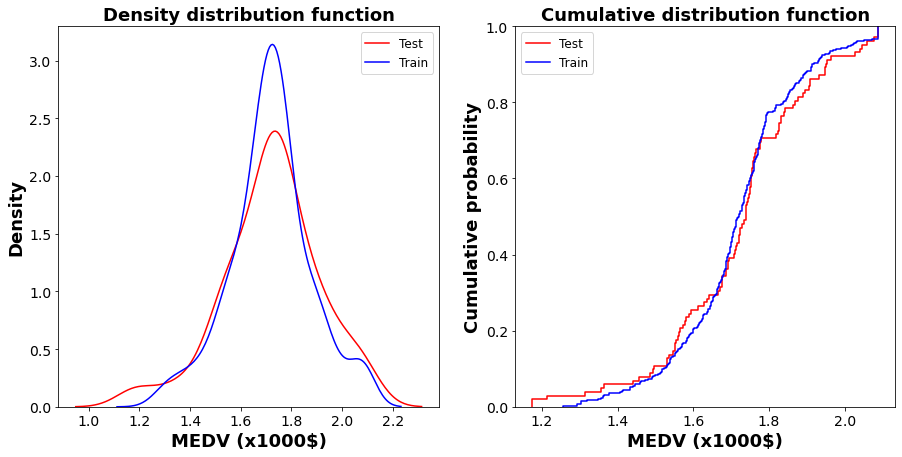

In [25]:
# Representation of the density and cumulative distribution function
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.ecdfplot(data=y_test, ax=ax[1], color='red', label='Test', legend=True)
sns.ecdfplot(data=y_train, ax=ax[1], color='blue', label='Train', legend=True)

sns.kdeplot(data=y_test, color='red', ax=ax[0],label='Test',legend=True)
sns.kdeplot(data=y_train, color='blue',ax=ax[0], label='Train',legend=True)
ax[0].legend(loc='best', fontsize='large', fancybox=True)
ax[1].legend(loc='best', fontsize='large', fancybox=True)
ax[0].set_xlabel("MEDV (x1000$)", fontsize = 18, fontweight = "bold");
ax[0].set_ylabel("Density", fontsize = 18, fontweight = "bold");
ax[1].set_xlabel("MEDV (x1000$)", fontsize = 18, fontweight = "bold");
ax[1].set_ylabel("Cumulative probability", fontsize = 18, fontweight = "bold");
ax[0].set_title("Density distribution function", fontsize = 18, fontweight = "bold");
ax[0].tick_params(labelsize = 14)
ax[1].set_title("Cumulative distribution function", fontsize = 18, fontweight = "bold");
ax[1].tick_params(labelsize = 14)

In [26]:
# Test Kolmogorov–Smirnov between the train and test dataset
# ==============================================================================
from scipy.stats import ks_2samp
ks_2samp(y_test,y_train)

KstestResult(statistic=0.07877111240535818, pvalue=0.6582314443130406)

The $p_{value}$ is much larger than 0.05, and hence, we may not reject the null hyphotesis, which states that the two distributions are the same. 

### Comparing X-test and X-train

In [27]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,404.0,0.392555,0.249198,0.000000,0.173387,0.338343,0.646628,1.000000
TAX,404.0,0.421208,0.323177,0.001908,0.174618,0.272901,0.914122,1.000000
NOX,404.0,0.352253,0.239067,0.000000,0.139918,0.314815,0.491770,1.000000
CRIM,404.0,0.038412,0.092135,0.000000,0.000857,0.002856,0.041449,1.000000
RAD,404.0,0.371825,0.380072,0.000000,0.130435,0.173913,1.000000,1.000000
AGE,404.0,0.680530,0.285191,0.000000,0.441813,0.764676,0.937178,1.000000
ZN,404.0,0.108181,0.230616,0.000000,0.000000,0.000000,0.031250,0.950000
B,404.0,0.891488,0.241041,0.000000,0.943586,0.987342,0.998449,1.000000
DIS,404.0,0.235958,0.180396,0.000000,0.089198,0.188949,0.361454,0.859888


In [28]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,102.0,0.386712,0.261531,0.028959,0.137463,0.346041,0.646628,1.000000
TAX,102.0,0.426171,0.316998,0.000000,0.191794,0.282443,0.914122,1.000000
NOX,102.0,0.336944,0.236670,0.008230,0.109568,0.314815,0.491770,1.000000
CRIM,102.0,0.048988,0.113017,0.000052,0.000818,0.002749,0.038580,0.763342
RAD,102.0,0.371270,0.374448,0.000000,0.130435,0.173913,0.826087,1.000000
AGE,102.0,0.659861,0.308744,0.031926,0.388774,0.781153,0.943872,1.000000
ZN,102.0,0.135245,0.243246,0.000000,0.000000,0.000000,0.200000,1.000000
B,102.0,0.926611,0.179303,0.008397,0.950464,0.982046,0.997018,1.000000
DIS,102.0,0.267823,0.229478,0.004410,0.083724,0.188198,0.394607,1.000000


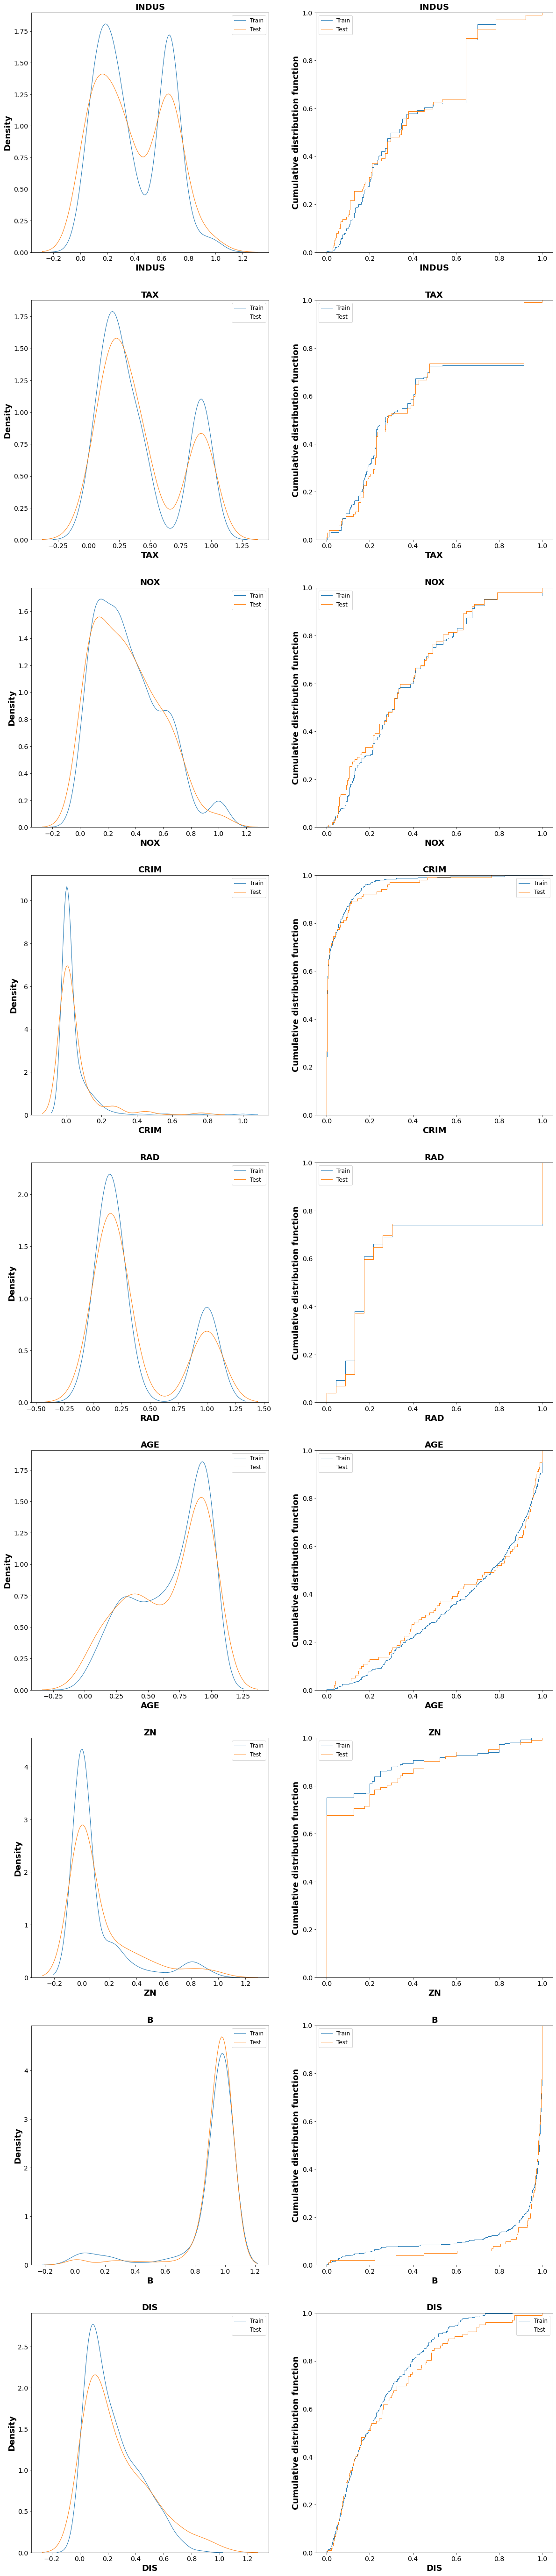

In [29]:
# Representation of the density and cumulative distribution function
# ==============================================================================
fig, axs = plt.subplots(ncols=2, nrows=len(X_train.columns), figsize=(20, 100))
row=0
for i in X_train.columns:
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.kdeplot(x=X_train[i], label='Train',  ax=axs[row][0] , legend=True,linewidth= 1.0)
    sns.kdeplot(x=X_test[i],label='Test',  ax=axs[row][0] , legend=True, linewidth= 1.0)
    sns.ecdfplot(x=X_train[i], label='Train',  ax=axs[row][1] , legend=True,linewidth= 1.0)
    sns.ecdfplot(x=X_test[i],label='Test',  ax=axs[row][1] , legend=True, linewidth= 1.0)
    axs[row][0].legend(loc='best', fontsize='large', fancybox=True)
    axs[row][1].legend(loc='best', fontsize='large', fancybox=True)
    axs[row][0].set_xlabel(str(i), fontsize = 18, fontweight = "bold")
    axs[row][0].set_ylabel('Density', fontsize = 18, fontweight = "bold")
    axs[row][0].set_title(str(i), fontsize = 18, fontweight = "bold")
    axs[row][0].tick_params(labelsize = 14)
    axs[row][1].set_xlabel(str(i), fontsize = 18, fontweight = "bold")
    axs[row][1].set_ylabel('Cumulative distribution function', fontsize = 18, fontweight = "bold")
    axs[row][1].set_title(str(i), fontsize = 18, fontweight = "bold")
    axs[row][1].tick_params(labelsize = 14)
    row+=1

In [30]:
# Test Kolmogorov–Smirnov between the X-train and X-test dataset 
# ==============================================================================
for i in X_train.columns:
    print(ks_2samp(X_test[i],X_train[i]))

KstestResult(statistic=0.09153562415065036, pvalue=0.4700356949138177)
KstestResult(statistic=0.06746262861580275, pvalue=0.8235080104129006)
KstestResult(statistic=0.08906037662589789, pvalue=0.504852589800256)
KstestResult(statistic=0.06532712094738885, pvalue=0.8505343811614893)
KstestResult(statistic=0.05562026790914386, pvalue=0.9476971817419968)
KstestResult(statistic=0.06285187342263639, pvalue=0.8800417791379006)
KstestResult(statistic=0.07352941176470588, pvalue=0.7369905724947035)
KstestResult(statistic=0.10109687439332168, pvalue=0.34808287250025927)
KstestResult(statistic=0.07479130265967773, pvalue=0.7189193565666103)


The $p_{value}$ is much larger than 0.05 for each column of both datasets, hence we may not reject $H_0$, and we may conclude that the distribution between the train and test X-dataset are the same.

<div class="alert alert-success h1" role="alert">
    <b>Conclusions </b>
<a class="anchor" id="Conclusions"></a> </div>

We have studied the Boston housing dataset. We have applied mathematical transformations into the input variables, and the output variables, and studied statistically and graphically the variables, after the transformation and after being split into train and test datasets. By means of the statatistical tests we have concluded that the train and test datasets belong to the same density distribution and hence may be used for machine learning algorithms. 